# Assignment05: Webscraping 

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 

In [ ]:
response = requests.get('https://corgis-edu.github.io/corgis/csv/')

In [ ]:
response

In [ ]:
response.text

In [ ]:
# identifying one header from the CORGIS website info 

html_string = response.text 

document =  BeautifulSoup(html_string, "html.parser")

document.find('h3')

In [ ]:
# create a list that will hold the names of all the CORIGS datasets 
corgis_sets = [] 

#use find_all() to search for all headers 
for i in (document.find_all('h3')) : 
    
    # add the headers into the created variable 
    corgis_sets.append(i.text)
    
corgis_sets

In [ ]:
document.find_all('a')

In [ ]:
document.find('a').attrs

In [ ]:
document.find("a", attrs = {'href' : 'billionaires/'})

In [ ]:
# https://corgis-edu.github.io/corgis/datasets/csv/airlines/airlines.csv

response2 = requests.get('https://corgis-edu.github.io/corgis/csv/billionaires/')
htmlstring = response2.text 
document2 = BeautifulSoup(htmlstring, "html.parser") 

#document2.find_all('a')

for i in (document2.find_all('a')): 
    if i.has_attr('download'): 
        print(i)
        print (i['href'])
        

In [ ]:
string3 = '../../abc'
string3 = string3[6:]
string3

In [2]:
def pdcorgis(a): 
    
    #url's that will be used in getting data 
    corgis_url_base = 'https://corgis-edu.github.io/corgis/'
    corgis_url = 'https://corgis-edu.github.io/corgis/csv/'
    
    #format dataset title to be appended to url 
    corgis_title = a.lower() 
    corgis_title + '/' 
    
    #apprend to url 
    corgis_url = corgis_url + corgis_title 

    #get info from site using url 
    response = requests.get(corgis_url)
    html_string = response.text 
    document =  BeautifulSoup(html_string, "html.parser")
    
    
    #create a string that will be appended to url to download csv
    get_csv = '' 
    
    for i in (document.find_all('a')): 
        if i.has_attr('download'):
            get_csv = i['href'] 
            print (i['href'])
    
    #format to be appended
    get_csv = get_csv[6:] 
    
    #append to url 
    corgis_url = corgis_url_base + get_csv 
    
    #get the dataframe using the url 
    corgisdf = pd.read_csv(corgis_url)
    
    # return the dataframe 
    return corgisdf     

In [15]:
classics_df = pdcorgis("Classics") 

../../datasets/csv/classics/classics.csv


In [20]:
classics_df.head()

,bibliography.congress classifications,bibliography.languages,bibliography.subjects,bibliography.title,bibliography.type,metadata.downloads,metadata.id,metadata.rank,metadata.url,bibliography.author.birth,...,metrics.sentiments.polarity,metrics.sentiments.subjectivity,metrics.statistics.average letter per word,metrics.statistics.average sentence length,metrics.statistics.average sentence per word,metrics.statistics.characters,metrics.statistics.polysyllables,metrics.statistics.sentences,metrics.statistics.syllables,metrics.statistics.words
0,PR,en,"Sisters -- Fiction,Courtship -- Fiction,Social...",Pride and Prejudice,Text,36576,1342,1,https://www.gutenberg.org/ebooks/1342,1775,...,0.136713,0.522239,4.83,18.0,0.05,586794,4603,6511,170648.1,121533
1,PS,en,"Mentally ill women -- Fiction,Feminist fiction...",The Yellow Wallpaper,Text,26363,1952,2,https://www.gutenberg.org/ebooks/1952,1860,...,0.054174,0.534787,4.41,15.0,0.06,26769,102,385,7686.9,6067
2,"PZ,PR",en,Fantasy,Alice's Adventures in Wonderland,Text,18882,11,3,https://www.gutenberg.org/ebooks/11,1832,...,0.041079,0.497276,4.65,17.0,0.06,122719,339,1501,33810.3,26389
3,PR,en,Monsters -- Fiction;Frankenstein's monster (Fi...,"Frankenstein; Or, The Modern Prometheus",Text,17128,84,4,https://www.gutenberg.org/ebooks/84,1797,...,0.100902,0.539516,4.77,23.0,0.04,357604,2604,3239,106802.1,74959
4,PT,en,"Psychological fiction,Metamorphosis -- Fiction",Metamorphosis,Text,15683,5200,5,https://www.gutenberg.org/ebooks/5200,1883,...,0.041997,0.479019,4.56,27.0,0.04,100372,397,800,28752.3,22022


<AxesSubplot:xlabel='bibliography.author.birth', ylabel='metrics.statistics.words'>

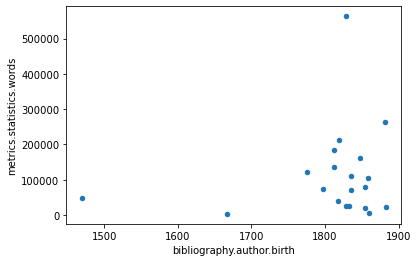

In [22]:
classics_df.plot(kind = 'scatter', x = 'bibliography.author.birth', y = 'metrics.statistics.words' )

In [3]:
billionaires_df = classics_df = pdcorgis("Billionaires") 

../../datasets/csv/billionaires/billionaires.csv


<AxesSubplot:ylabel='Frequency'>

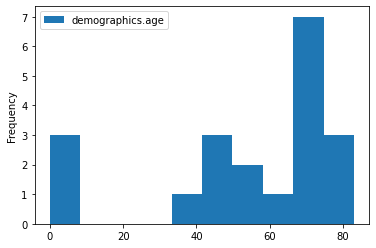

In [14]:
billionaires_df.plot(kind = 'hist', y = 'demographics.age')

In [23]:
cars_df = pdcorgis("Cars") 

../../datasets/csv/cars/cars.csv


In [24]:
cars_df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


<AxesSubplot:ylabel='Identification.Model Year'>

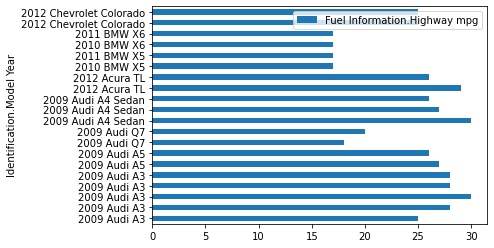

In [33]:
cars_df.plot(kind = 'barh', x = 'Identification.Model Year', y = 'Fuel Information.Highway mpg')